<a href="https://colab.research.google.com/github/thivyaa-web-dev/Commannd_line_prompt/blob/master/Sparks_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sparks Foundation Task 2 
TASK 2 - Prediction using Unsupervised Machine Learning
In this task it is required to predict the optimum number of cluster for the iris data set .iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica


STEP-1 Importing the data


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans



In [36]:
dataset = datasets.load_iris()
dataset = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [37]:

# Viewing the data

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:

dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [40]:

dataset.shape

(150, 4)

In [41]:
dataset.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [46]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [47]:
dataset.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Elbow method

In [50]:
# Calculating the within-cluster sum of square
x = dataset.iloc[:, [0, 1, 2, 3]].values


within_cluster_sum_of_square = []

clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    within_cluster_sum_of_square.append(km.inertia_)

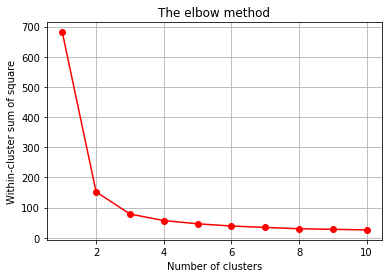

In [55]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [52]:

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(x)

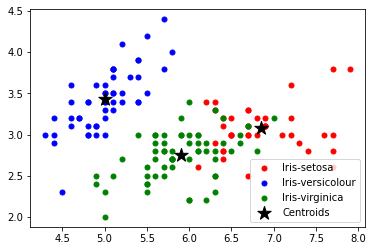

In [53]:
# Visualising the clusters - On the first two columns

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 200, c = 'black', marker='*',label = 'Centroids')
plt.legend()
plt.show()